In [1]:
import numpy as np
from matplotlib.pyplot import *

IMAGE_DIR = "../data/imgs/lenna.jpg"

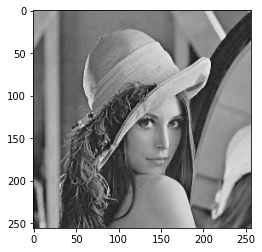

In [2]:
image = imread (IMAGE_DIR)

imshow(image, cmap = "gray")

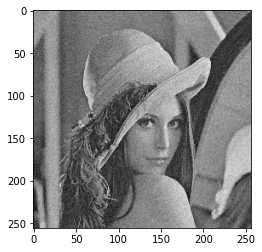

In [3]:
def gnoise (image, sigma = 12) :
    return image + np.random.normal (0,sigma, np.shape (image))

imshow(gnoise (image), cmap = 'gray')

In [4]:
def neumann_bc (image, border_size = 10) :
    d = border_size
    a, b = np.shape (image)[0], np.shape (image)[1]
        
    A = a + 2 * d
    B = b + 2 * d
    
    I = np.zeros ((A,B))
    
    I [d:(A-d) , d:(B-d)] = image
    
    for i in range (d,A-d) :
        for j in range (0,d) :
            I [i,j] = I [i, 2 * d - j]
            
        for j in range (0,d) :
            I [i,j+B-d] = I [i, B-d-1 - j]
    
    for j in range (0,B) :
        for i in range (0,d) :
            I [i,j] = I [2 * d - i, j]
            
        for i in range (0,d) :
            I [i+B-d,j] = I [B-d-1 - i, j]

    return I

In [5]:
def grad (P) :
    a, b = np.shape (P)[0], np.shape (P)[1]

    Dx = np.zeros ((256,256))
    Dy = np.zeros ((256,256))
    
    for i in range (a-1) :
        for j in range (b-1) :
            Dx [i,j] = P [i+1,j] - P [i,j] if i < a else 0
            Dy [i,j] = P [i,j+1] - P [i,j] if j < a else 0
    return Dx, Dy

def div (P) :
    a, b = np.shape (P)[1], np.shape (P)[2]

    Dx = np.zeros ((256,256))
    Dy = np.zeros ((256,256))

    
    for i in range (a-1) :
        for j in range (b-1) : 
            if i < a or j < a :
                Dx [i,j] = P [0,i,j] - P [0,i-1,j]
                Dy [i,j] = P [1,i,j] - P [1,i,j-1]
            elif i == 1 or j == 1 :
                Dx [i,j] = P [0,i,j]
                Dy [i,j] = P [1,i,j]
            else :
                Dx [i,j] = - P [0,i-1,j]
                Dy [i,j] = - P [1,i,j-1]

    return Dx + Dy

In [6]:
def norm (image) :
    '''This function returns the 2-norm of a matrix'''
    
    return np.linalg.norm (image)

In [10]:
def PSNR (Tu, Du) :
    return 20 * np.log10 (np.divide (255, norm(Tu-Du)))
    
def SNR (Tu, Du) :
    return 10 * np.log10 (np.divide (norm(Tu), norm(Tu-Du)))

number of iterations 101 
 0.5
PSNR 	 47.512824130656824 
SNR 	 90.18001961846866


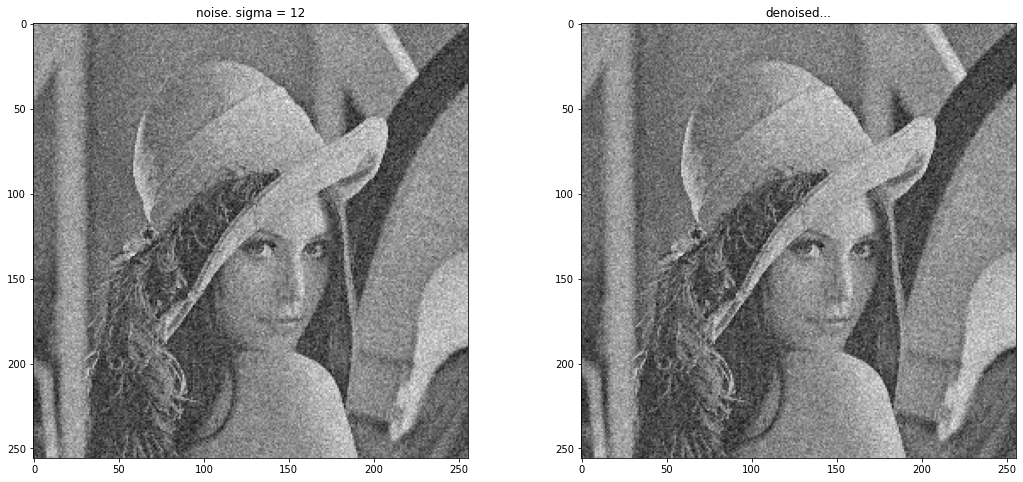

In [15]:
def chambolle (P0 = image, tau = .2, sigma = 25):
#     p = np.ones_like ((P0,P0)).reshape((2,256,256))
    x = np.zeros_like ((P0,P0)).reshape((2,256,256))

    
#     x = np.random.randint (0.5, 1, size = (2,256,256))
    p = x
    
#     print (x)
    
    idt = np.ones_like ((P0,P0)).reshape((2,256,256))
    

#     l = np.divide (np.shape (P0)[1] * sigma, norm (div(p)))
    
    l = 1/2
    
    A = np.zeros_like ((P0,P0)).reshape((2,256,256))
    B = np.zeros_like ((P0,P0)).reshape((2,256,256))    
    
    
    i = 1
    while True :
        graddiv = grad (div(p) - np.divide (P0,l))
                
        A = p + np.dot(tau, graddiv)
        B = idt * tau * norm (graddiv)
        
        p = np.divide (A,B)

#         print (np.shape (np.dot(.2, graddiv)))
#         l = np.divide (np.shape (P0)[1] * sigma, norm (div(p)))


#         if (p - x).all() < 1/1000:            
    
        if i > 100 :
            break
        else :
            i += 1
            x = p

    print (
        "number of iterations", i, "\n",
        l,
#         p, x,
#         (p-x) < 1/100
    )
    return P0 - l * div (p)

fig = figure(figsize=(18,8))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('noise. sigma = 12')
imshow(I := gnoise (image, sigma = 25), cmap = 'gray')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('denoised...')
imshow(DI := chambolle (I), cmap = 'gray')


print (
    'PSNR \t', PSNR (I, DI), '\n'
    'SNR \t', SNR (I, DI),
)